Converted API data to data.csv
Total amount of unique Recalling Firms associated to the FDA Recalls is 132
Recalling Firm
Cardinal Health Inc.                                       18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy          18
Mckesson Medical-Surgical Inc. Corporate Office            16
Herbal Doctor Remedies                                     10
Teva Pharmaceuticals USA                                    8
Teligent Pharma, Inc.                                       7
Fusion IV Pharmaceuticals, Inc. dba Axia Pharmaceutical     7
Pharmacy Innovations                                        7
Perrigo Company PLC                                         6
Accord Healthcare, Inc.                                     6
Name: count, dtype: int64


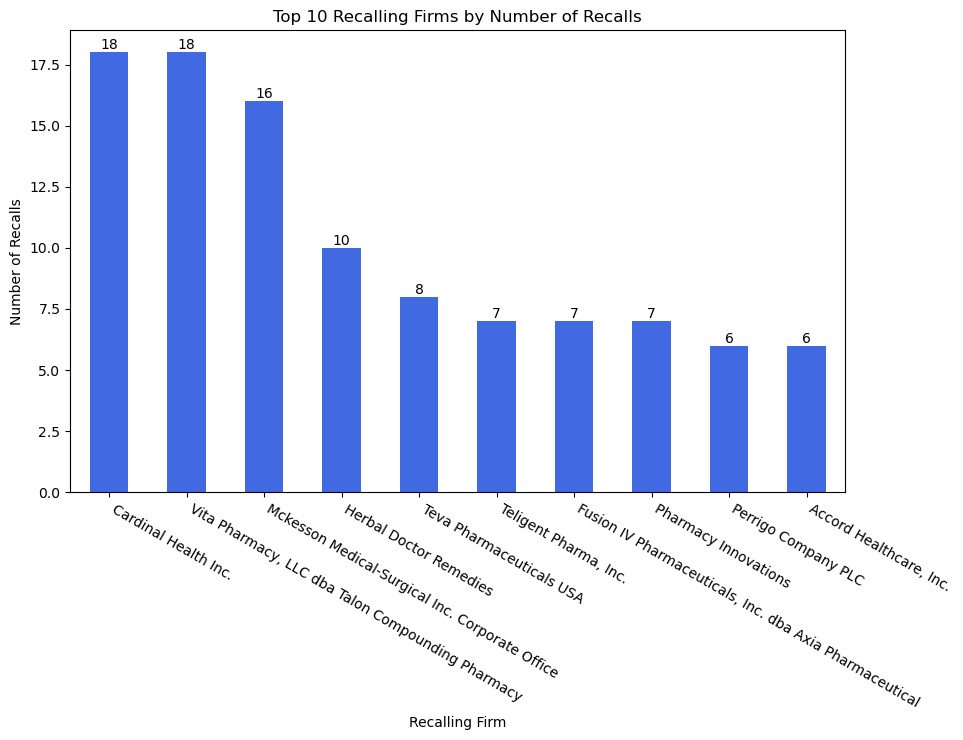

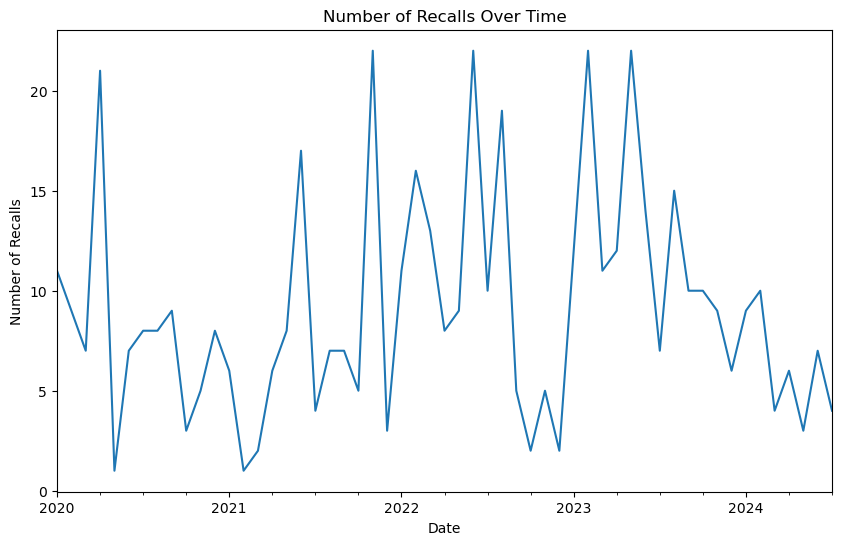

<Figure size 1200x600 with 0 Axes>

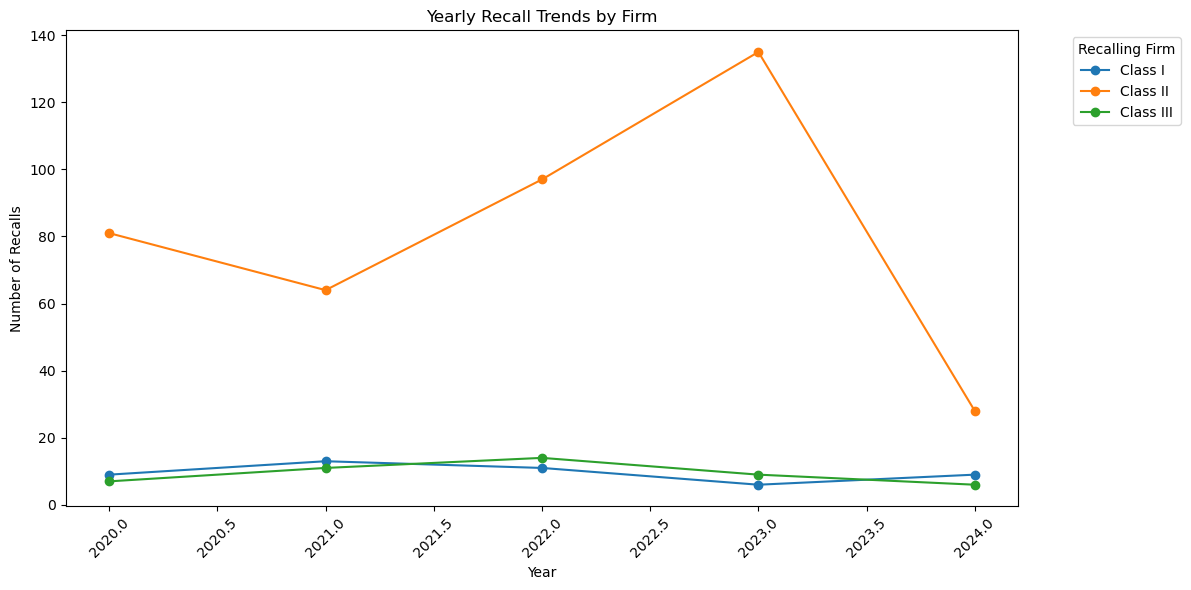

Earliest Date: January 2020
Latest Date: April 2024
['NJ' 'MI' 'OH' 'NY' 'GA' 'CT' 'CA' 'TX' 'TN' 'FL' 'PA' 'MA' 'NM' 'VA'
 'WV' 'AR' 'OR' 'CO' 'AZ' 'NC' 'MN' 'UT' 'LA' 'IA' 'MO' 'IL' 'VT' 'PR'
 'MD' 'KY' 'SC' 'WA' 'DE']
33 States Impacted by FDA Recalls between January 2020 to April 2024
State
NJ    54
TX    34
CA    31
OH    28
NY    23
VA    21
FL    14
CT    11
PA    11
NC    10
Name: count, dtype: int64
['NJ', 'TX', 'CA', 'OH', 'NY', 'VA', 'FL', 'CT', 'PA', 'NC']


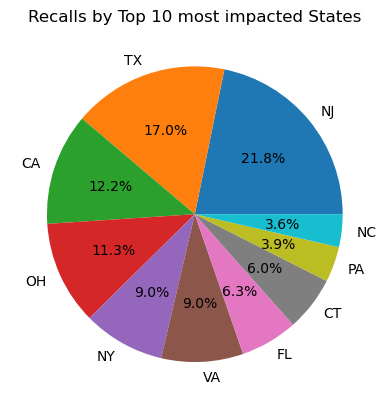

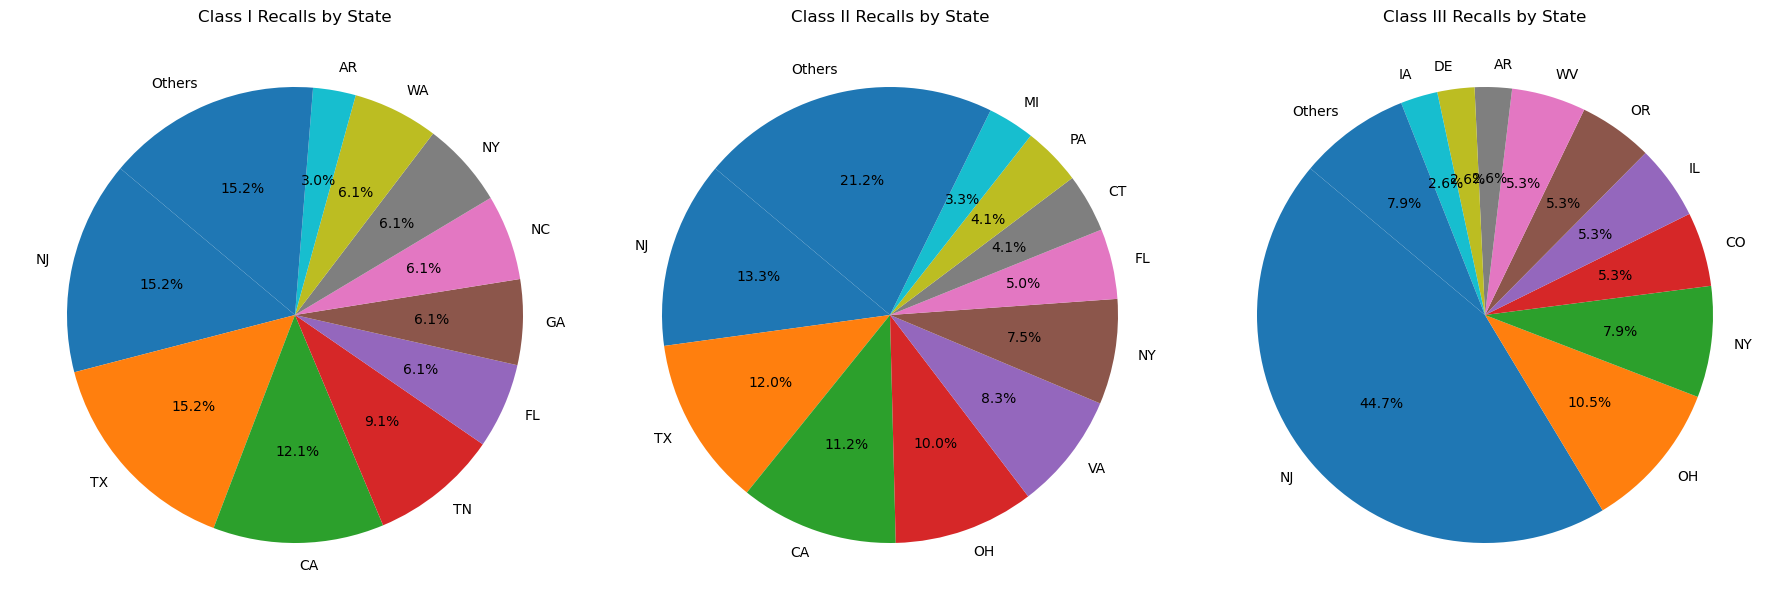

Recall counts by Classification and Year:
Report Year     2020  2021  2022  2023  2024
Classification                              
Class I            9    11    11     2     0
Class II          70    57    62    42    10
Class III          6    11    14     7     0


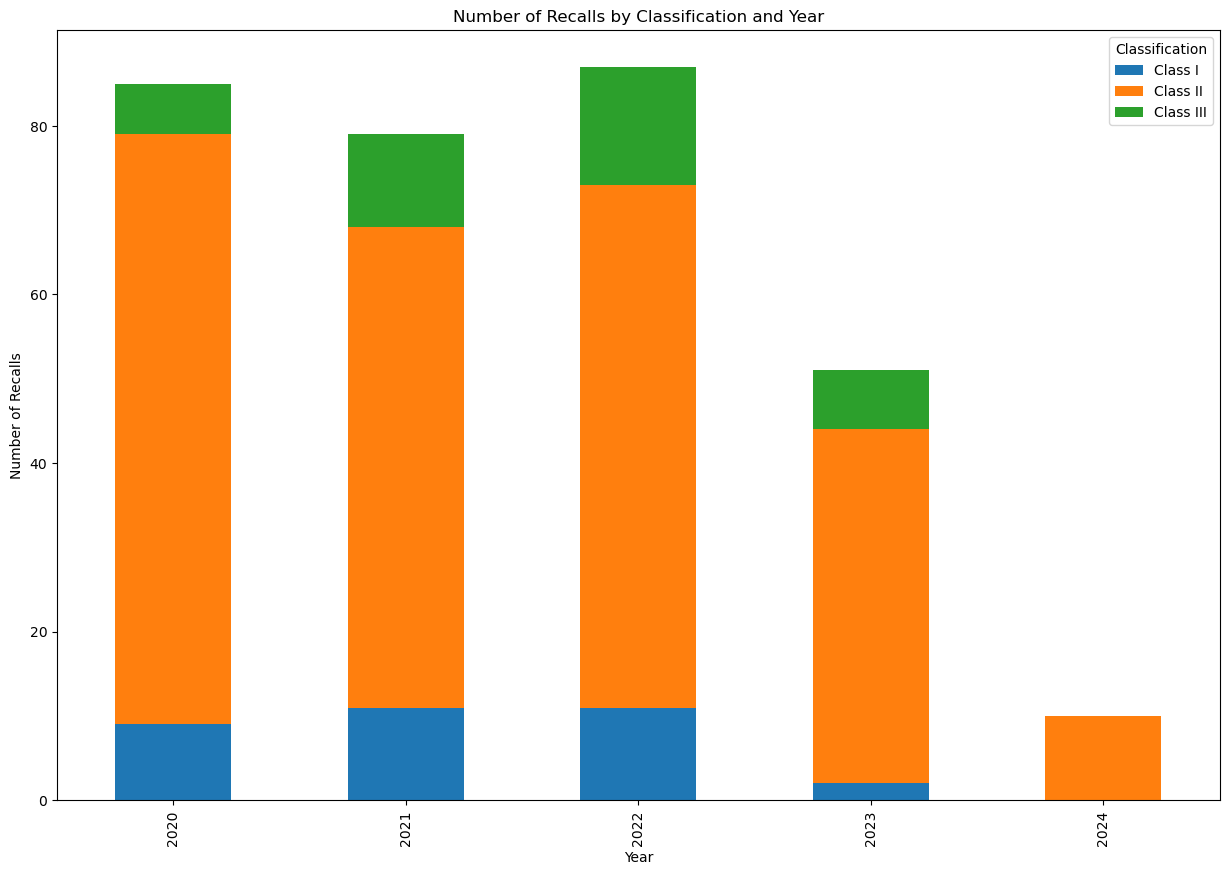

       Status        City State        Country Classification  \
1  Terminated  Parsippany    NJ  United States       Class II   
2  Terminated     Allegan    MI  United States       Class II   
4  Terminated      Dublin    OH  United States       Class II   
5  Terminated      Dublin    OH  United States       Class II   
8  Terminated  Brookhaven    NY  United States       Class II   

                                            Open FDA Product Type Event ID  \
1  {'application_number': ['ANDA040422'], 'brand_...        Drugs    85712   
2  {'application_number': ['M012'], 'brand_name':...        Drugs    88905   
4  {'application_number': ['NDA200796'], 'brand_n...        Drugs    87512   
5  {'application_number': ['ANDA077857'], 'brand_...        Drugs    89450   
8  {'application_number': ['ANDA090576'], 'brand_...        Drugs    85386   

                            Recalling Firm           Address 1  ...  \
1                 Teva Pharmaceuticals USA  400 Interpace Pkwy  ...  

In [2]:
# In[1]:


import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

# Define the API endpoint and parameters
url = "https://api.fda.gov/drug/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)

    # Convert DataFrame to CSV
    csv_file_path = 'data.csv'
    recall_df.to_csv(csv_file_path, index=False)
    
    print(f"Converted API data to {csv_file_path}")
else:
    print("Failed to retrieve data:", response.status_code)


# In[2]:


clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     
                                    
                                    })


clean_df.head()


# In[3]:


US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]
US_recalls_df.head()


# In[4]:


recalling_firm_df = US_recalls_df["Recalling Firm"].unique()
recalling_firm_count_df = len(recalling_firm_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )


# In[5]:


firm_count_df = US_recalls_df["Recalling Firm"].value_counts().head(10)

print(firm_count_df)


# In[6]:


# Ensure the directory exists
output_dir = "data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your plotting code
ax = firm_count_df.plot(kind="bar", 
                   color="royalblue",
                   figsize=(10, 6), 
                   title="Top 10 Recalling Firms by Number of Recalls")
plt.xlabel("Recalling Firm")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=-30, ha="left")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Determine the label position: top or bottom of the bar
        y_offset = height if height > 0 else height
        va = "bottom" if height > 0 else "top"
        
        # Add a text label
        ax.text(bar.get_x() + bar.get_width() / 2, y_offset, 
                f'{height}', 
                ha="center", va=va)

# Save the figure
plt.savefig(os.path.join(output_dir, "Top 10 Recalling Firms by Number of Recalls.png"))
plt.show()


# In[7]:


# Get the top 15 recalling firms
top_firms = clean_df["Recalling Firm"].value_counts().head(10).index

# Filter the dataset to include only the top 15 firms
filtered_df = clean_df[clean_df["Recalling Firm"].isin(top_firms)]

# Group the data by firm and status
grouped_data = filtered_df.groupby(["Recalling Firm", 'Classification']).size().unstack(fill_value=0)

# Create a single subplot
fig = go.Figure()

# Stacked bar plot for status breakdown
for status in grouped_data.columns:
    fig.add_trace(
        go.Bar(x=grouped_data.index, y=grouped_data[status], name=status)
    )

# Update layout for a better presentation
fig.update_layout(
    barmode="stack",
    height=700,
    width=1000,
    title_text="Classification Breakdown by Top 10 Recalling Firms",
    showlegend=True
)

fig.update_xaxes(title_text="Recalling Firm")


# In[8]:


# Load the dataset
df = pd.read_csv('data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and month, then count the number of recalls
recall_trends = df.groupby(df['report_date'].dt.to_period('M')).size()

# Plot the recall trends over time
recall_trends.plot(kind='line', figsize=(10, 6), title='Number of Recalls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recalls')
plt.show()


# In[9]:


# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)
recall_trends_yearly


# In[10]:


# Group by year and classification, then count the number of recalls
plt.figure(figsize=(12, 6))
recall_trends_yearly.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Yearly Recall Trends by Firm")
plt.xlabel("Year")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=45)
plt.legend(title="Recalling Firm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


# In[11]:


#states impacted by Recalls?
US_recalls_df = US_recalls_df[US_recalls_df['State'].str.strip() != '']
states_impacted = US_recalls_df['State'].unique()
states_impactedcount = len(states_impacted)
time_period = US_recalls_df['Report Date'].unique()

time_period_dates = pd.to_datetime(time_period)

# Sort dates
time_period_dates = time_period_dates.sort_values()

earliest_date = time_period_dates[0]
latest_date = time_period_dates[-1]

# Print the earliest and latest dates 
print(f"Earliest Date: {earliest_date.strftime('%B %Y')}")
print(f"Latest Date: {latest_date.strftime('%B %Y')}")


print(states_impacted)
print(str(states_impactedcount) + ' States Impacted by FDA Recalls' + ' '+'between ' + earliest_date.strftime('%B %Y') + ' to ' + latest_date.strftime('%B %Y'))


# In[12]:


state_counts = US_recalls_df['State'].value_counts().head(10)
print(state_counts)


# In[13]:


Impacted_states = state_counts.head(10).index.tolist()
print(Impacted_states)


# In[14]:


# Get the top 5 most impacted states
top_states = Impacted_states[:10]

# Get the count of recalls for each state
state_counts = clean_df['State'].value_counts()

# Filter the state counts for the top 5 states
top_state_counts = state_counts[state_counts.index.isin(top_states)]

# Plot 
plt.pie(top_state_counts, labels=top_states, autopct='%1.1f%%')
plt.title('Recalls by Top 10 most impacted States')
plt.show()


# In[15]:


# Group by Classification and State, and count the occurrences
classification_state_counts = US_recalls_df.groupby(['Classification', 'State']).size().unstack(fill_value=0)
    
    # Function to prepare data for pie chart with top 10 states and "Others"
def prepare_pie_data(data):
        top_10 = data.nlargest(10)
        others = pd.Series(data.sum() - top_10.sum(), index=['Others'])
        return pd.concat([top_10, others])
    
    # Plot pie charts for each classification
classifications = ['Class I', 'Class II', 'Class III']
    
plt.figure(figsize=(18, 6))  # Adjust the size to fit three pie charts
    
for i, classification in enumerate(classifications):
        plt.subplot(1, 3, i + 1)
        if classification in classification_state_counts.index:
            pie_data = prepare_pie_data(classification_state_counts.loc[classification])
            pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f'{classification} Recalls by State')
            plt.ylabel('')  # Remove the y-label to clean up the plot
    
plt.tight_layout()
plt.show()


# In[16]:


# Count recalls by classification and year
# Extract year from report_date
US_recalls_df['Report Year'] = pd.to_datetime(US_recalls_df['Report Date']).dt.year
    
    # Group by Classification and Report Year, and count the occurrences
classification_year_counts = US_recalls_df.groupby(['Classification', 'Report Year']).size().unstack(fill_value=0)
    
    # Display the counts in the console
print("Recall counts by Classification and Year:")
print(classification_year_counts)
  


# In[17]:


# Plot classification and year relationship
classification_year_counts.T.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Recalls by Classification and Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.show()


# In[23]:


print(US_recalls_df.head())


# In[34]:


recall_product = US_recalls_df.groupby([US_recalls_df['Product Description'], 'Reason for Recall']).size().unstack(fill_value=0)
print(recall_product)




Total amount of unique Recalling Firms associated to the FDA Recalls is 187
Recalling Firm
Cardinal Health Inc.                                 20
Central Admixture Pharmacy Services, Inc.            19
Akorn, Inc.                                          19
Vita Pharmacy, LLC dba Talon Compounding Pharmacy    18
Mckesson Medical-Surgical Inc. Corporate Office      16
Family Dollar Stores, Llc.                           12
Central Admixture Pharmacy Services Inc              11
Herbal Doctor Remedies                               10
Preferred Pharmaceuticals, Inc.                      10
Teva Pharmaceuticals USA                              8
Name: count, dtype: int64


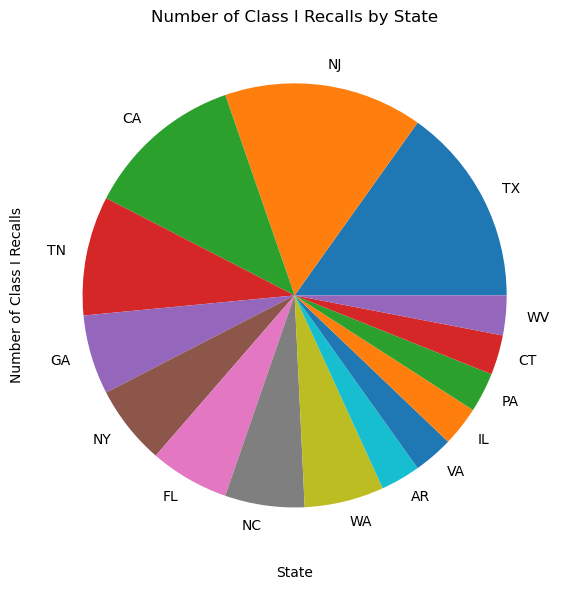

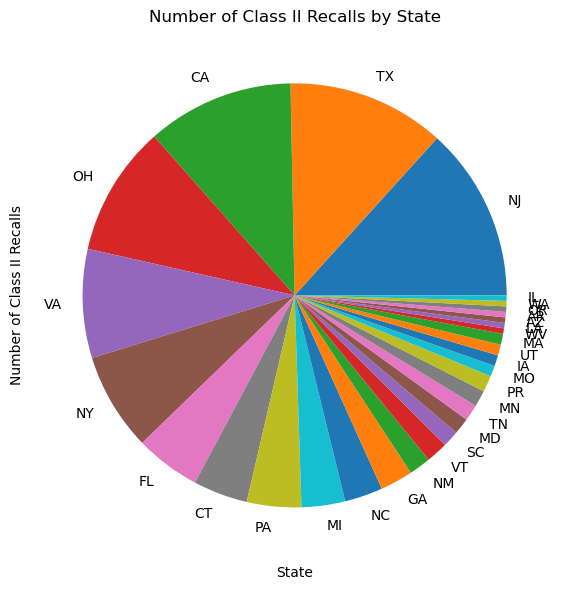

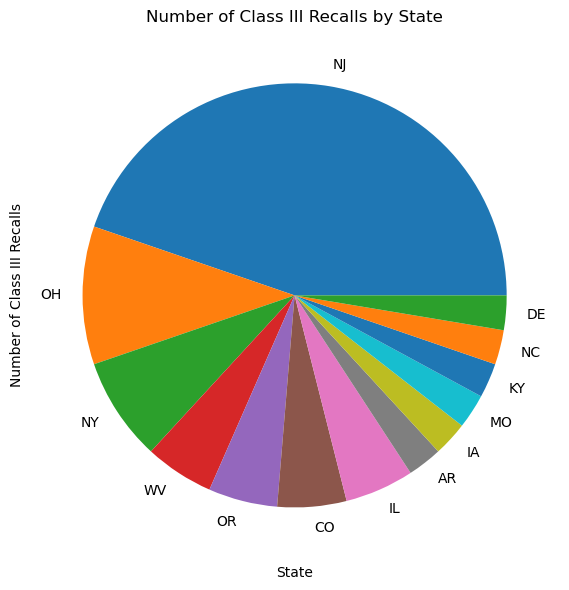

Firms with the Most Recalls:
Recalling Firm
Cardinal Health Inc.                                 18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy    18
Mckesson Medical-Surgical Inc. Corporate Office      16
Herbal Doctor Remedies                               10
Teva Pharmaceuticals USA                              8
                                                     ..
Fresenius Medical Care, North America                 1
Pink Toyz                                             1
Custopharm, Inc.                                      1
US Compounding Inc                                    1
Milbar Laboratories, Inc.                             1
Name: count, Length: 132, dtype: int64

Drug Types Recalled by Top Companies:
Top Ten Firms with the Most Recalls:
Recalling Firm
Cardinal Health Inc.                                       18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy          18
Mckesson Medical-Surgical Inc. Corporate Office            16
Herbal Doctor Remedies  

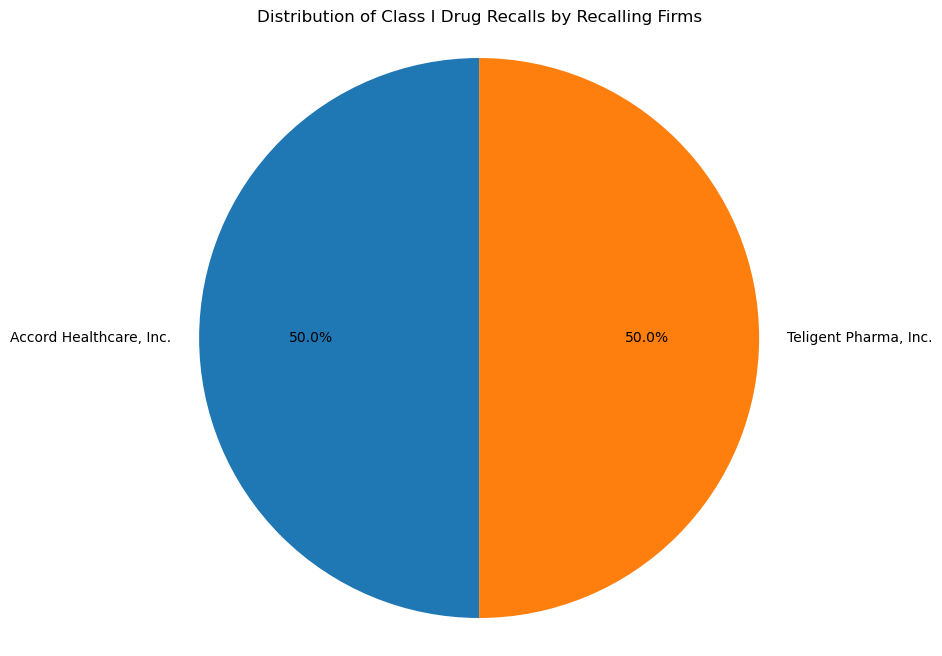

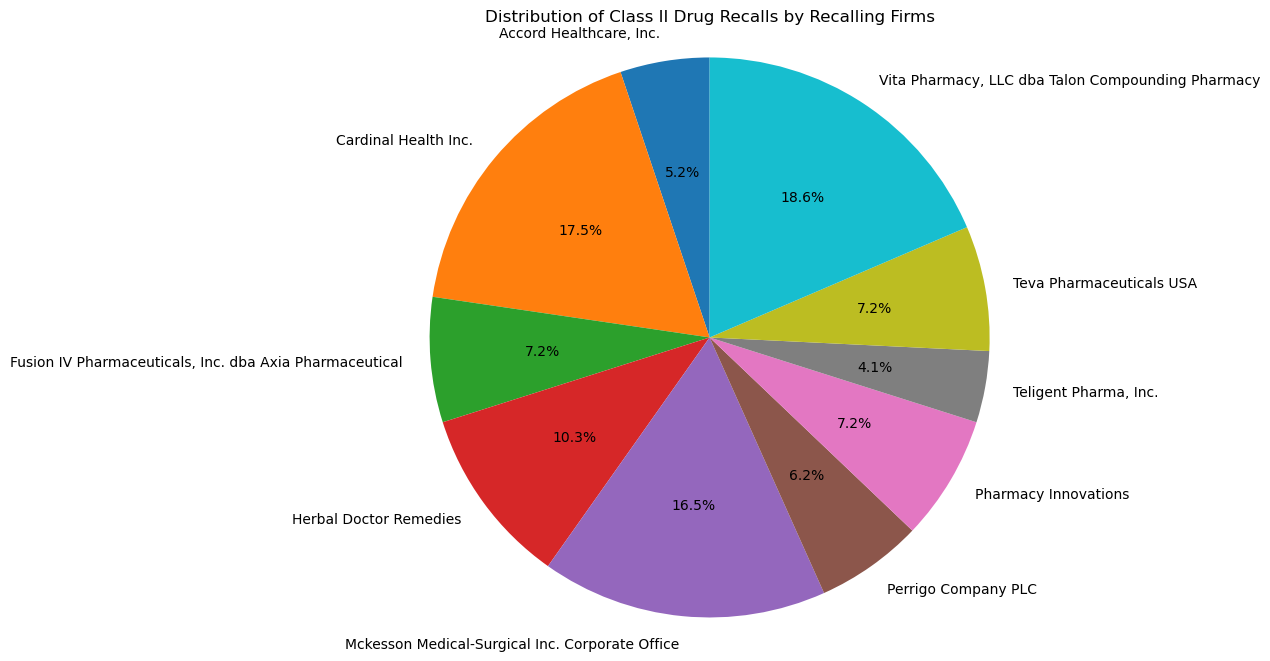

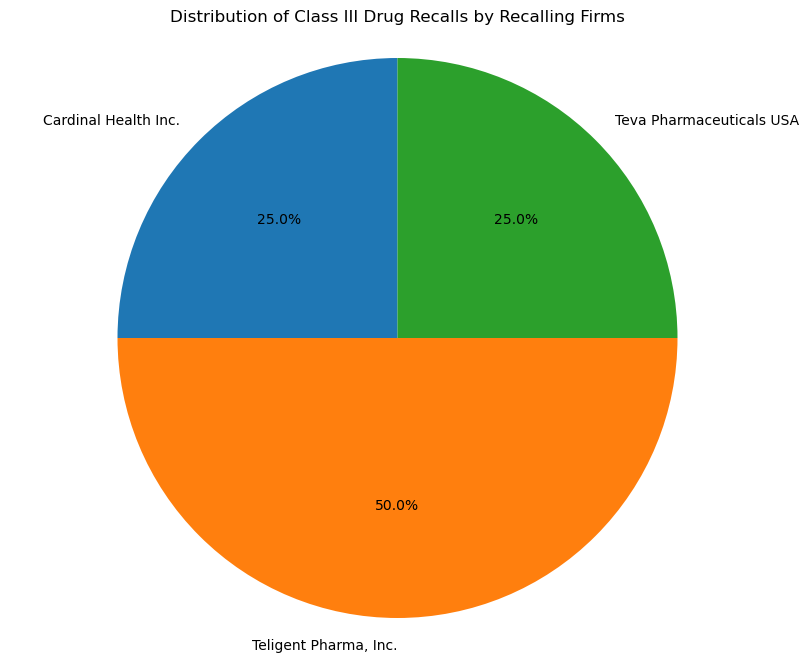

C:\Users\silve\AppData\Local\Temp\ipykernel_25464\3294351427.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\silve\AppData\Local\Temp\ipykernel_25464\3294351427.py:364: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\silve\AppData\Local\Temp\ipykernel_25464\3294351427.py:367: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Firm that took the most time to close a recall:
Recalling Firm          Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...
Time to Close (Days)                                               1422.0
Name: 2, dtype: object

Average Time to Close Recalls by Firm:
                                      Recalling Firm  Time to Close (Days)
2  Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...           1422.000000
3                             Herbal Doctor Remedies           1402.000000
1                               Cardinal Health Inc.           1137.222222
7                              Teligent Pharma, Inc.            992.714286
8                           Teva Pharmaceuticals USA            783.875000
9  Vita Pharmacy, LLC dba Talon Compounding Pharmacy            722.000000
5                                Perrigo Company PLC            625.000000
6                               Pharmacy Innovations            587.000000
4    Mckesson Medical-Surgical Inc. Corporate Office            57

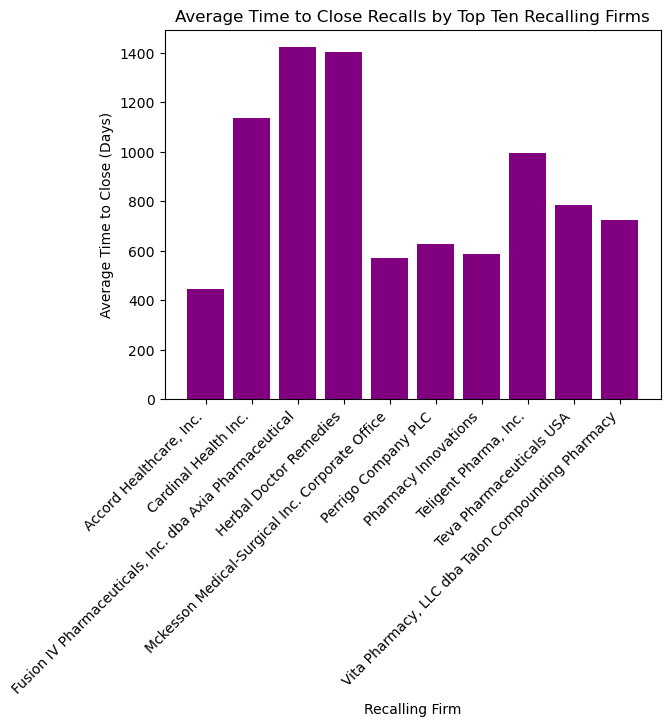

Firm that took the most time to close a recall:
Recalling Firm          Teligent Pharma, Inc.
Time to Close (Days)                    980.0
Name: 1, dtype: object

Average Time to Close Recalls by Firm:
            Recalling Firm  Time to Close (Days)
1    Teligent Pharma, Inc.                 980.0
0  Accord Healthcare, Inc.                 450.0


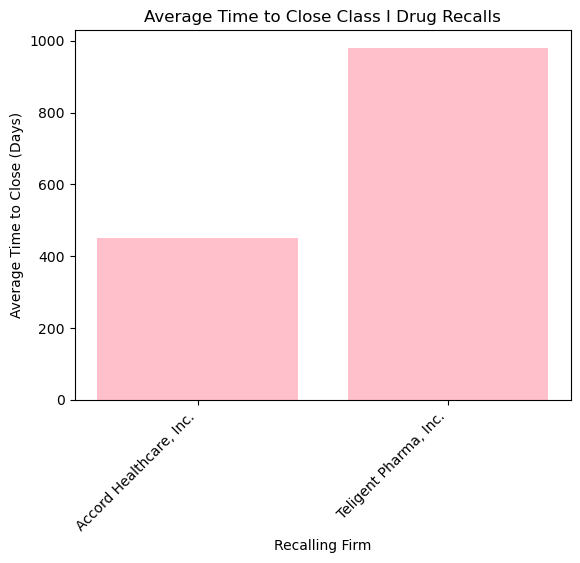

Firm that took the most time to close a recall:
Recalling Firm          Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...
Time to Close (Days)                                               1422.0
Name: 2, dtype: object

Average Time to Close Recalls by Firm:
                                      Recalling Firm  Time to Close (Days)
2  Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...           1422.000000
3                             Herbal Doctor Remedies           1402.000000
1                               Cardinal Health Inc.           1190.000000
7                              Teligent Pharma, Inc.            929.750000
8                           Teva Pharmaceuticals USA            832.857143
9  Vita Pharmacy, LLC dba Talon Compounding Pharmacy            722.000000
5                                Perrigo Company PLC            625.000000
6                               Pharmacy Innovations            587.000000
4    Mckesson Medical-Surgical Inc. Corporate Office            57

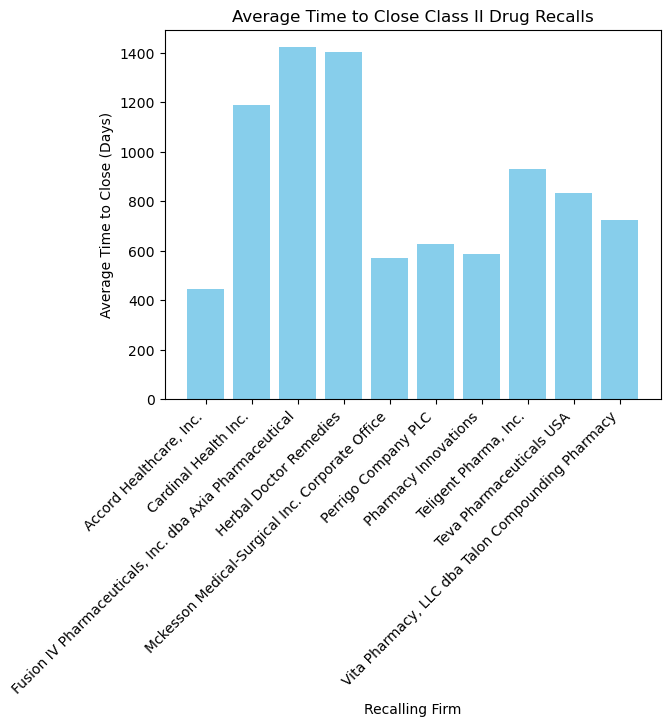

Firm that took the most time to close a recall:
Recalling Firm          Teligent Pharma, Inc.
Time to Close (Days)                   1125.0
Name: 1, dtype: object

Average Time to Close Recalls by Firm:
             Recalling Firm  Time to Close (Days)
1     Teligent Pharma, Inc.                1125.0
2  Teva Pharmaceuticals USA                 441.0
0      Cardinal Health Inc.                 240.0


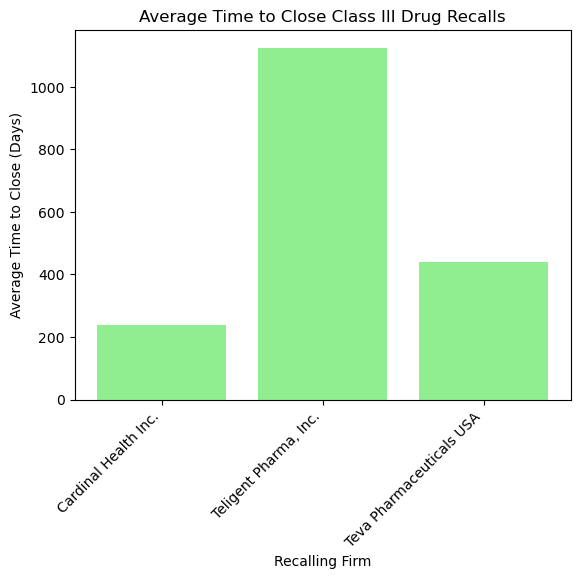

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[37]:


import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint and parameters
url = "https://api.fda.gov/drug/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    #recall_df.to_csv('output_data/fda_drug_enforcement_data.csv', index=False)


# In[77]:


clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     
                                    
                                    })

#clean_df.head()


# In[39]:


#Save cleaned DataFrame to output
clean_df.to_csv('output_data/fda_drug_enforcement_data.csv', index=False)


# In[40]:


recalling_firm_df = clean_df["Recalling Firm"].unique()
recalling_firm_count_df = len(recalling_firm_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )


# In[41]:


firm_count_df = clean_df["Recalling Firm"].value_counts().head(10)

print(firm_count_df)


# In[42]:


# Amount of each class of drug recalls
clean_df['Classification'].value_counts()


# In[76]:


#Clean DataFrame to only USA
US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]             
#US_recalls_df.head()


# In[78]:


#Cut down DataFrame further to specified columns
US_recalls_df= US_recalls_df[['Status', 'City', 'State', 'Country', 'Classification', 'Product Type', 'Recalling Firm', 'Product Description', 'Product Quantity', 'Reason for Recall', 'Recall Initiation Date', 'Termination Date']]

#US_recalls_df.head()


# In[45]:


US_recalls_df.to_csv('output_data/us_recalls_data.csv', index=False)


# In[46]:


# Amount of recalls per state
#US_recalls_df['State'].value_counts()


# # MAKE GRAPHS AND VISUALIZATIONS 
# 
# #Which classification was recalled most and where.
# #	-Class I
# #	-Class II
# #	-Class III
# #Which companies had the most recalls
# #	-Which type of drugs did they have recalled.
# #How much time it takes to close a recall.
# #	-who took most time to recall.

# # Class I DataFrame and Bar Graph

# In[75]:


#Class I recall DataFrame
classI_df = US_recalls_df[US_recalls_df['Classification'] == 'Class I']

#classI_df.head()


# In[48]:


#Bar Graph of number of Class I recalls vs state
state_counts = classI_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='pie', color='pink')
plt.title('Number of Class I Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class I Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classI_recalls.jpeg")
#plt.show()


# # Class II DataFrame and Bar Graph

# In[79]:


#Class II recall DataFrame
classII_df = US_recalls_df[US_recalls_df['Classification'] == 'Class II']

#classII_df.head()


# In[50]:


#Bar Graph of number of Class II recalls vs state
state_counts = classII_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='pie', color='skyblue')
plt.title('Number of Class II Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class II Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classII_recalls.jpeg")
plt.show()


# # Class III DataFrame and Bar Graph

# In[74]:


#Class III recall DataFrame
classIII_df = US_recalls_df[US_recalls_df['Classification'] == 'Class III']

#classIII_df.head()


# In[52]:


#Bar Graph of number of Class III recalls vs state
state_counts = classIII_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='pie', color='lightgreen')
plt.title('Number of Class III Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class III Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classIII_recalls.jpeg")
plt.show()


# # Company Recalls DataFrame and BarGraphs

# In[53]:


#Which companies had the most recalls
#	-Which type of drugs did they have recalled.
company_counts = US_recalls_df['Recalling Firm'].value_counts()

# Get the top companies with the most recalls
top_companies = company_counts  

# Display top companies
print("Firms with the Most Recalls:")
print(top_companies)

# Filter the original DataFrame for the top companies
top_company_names = top_companies.index
top_recalls_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_company_names)]

# Group by company and type of drug
drug_types_by_company = top_recalls_df.groupby(['Recalling Firm', 'Classification']).size().reset_index(name='Recall Count')

# Display the result
print("\nDrug Types Recalled by Top Companies:")
drug_types_by_company


# In[54]:


# Get the top ten companies with the most recalls
top_companies = company_counts.head(10)

# Display top ten companies
print("Top Ten Firms with the Most Recalls:")
print(top_companies)

# Filter the original DataFrame for the top ten companies
top_company_names = top_companies.index
top_recalls_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_company_names)]

# Group by company and type of drug
drug_types_by_company = top_recalls_df.groupby(['Recalling Firm', 'Classification', ]).size().reset_index(name='Recall Count')

# Display the result
print("\nDrug Types Recalled by Top Ten Companies:")
drug_types_by_company


# In[55]:


# Filter for Class I drugs
class_i_data = drug_types_by_company[drug_types_by_company['Classification'] == 'Class I']

# Create a pie chart for Class I recalls by each recalling firm
plt.figure(figsize=(10, 8))
plt.pie(class_i_data['Recall Count'], labels=class_i_data['Recalling Firm'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class I Drug Recalls by Recalling Firms')
plt.axis('equal')  

plt.savefig("./output_data/class_i_drug_recalls_firms.jpeg")  # Save the figure
plt.show()


# In[56]:


#Filter for Class I drugs
class_ii_data = drug_types_by_company[drug_types_by_company['Classification'] == 'Class II']

# Create a pie chart for Class I recalls by each recalling firm
plt.figure(figsize=(10, 8))
plt.pie(class_ii_data['Recall Count'], labels=class_ii_data['Recalling Firm'], 
       autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class II Drug Recalls by Recalling Firms')
plt.axis('equal')  

plt.savefig("./output_data/class_ii_drug_recalls_firms.jpeg")  
plt.show()#


# In[57]:


# Filter for Class I drugs
class_iii_data = drug_types_by_company[drug_types_by_company['Classification'] == 'Class III']

# Create a pie chart for Class I recalls by each recalling firm
plt.figure(figsize=(10, 8))
plt.pie(class_iii_data['Recall Count'], labels=class_iii_data['Recalling Firm'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class III Drug Recalls by Recalling Firms')
plt.axis('equal') 

plt.savefig("./output_data/class_iii_drug_recalls_firms.jpeg")  
plt.show()


# # Recall Times per Recalling Firm

# In[73]:


# List of top ten firms
top_ten_firms = [
    'Cardinal Health Inc.', 
    'Vita Pharmacy, LLC dba Talon Compounding Pharmacy',
    'Mckesson Medical-Surgical Inc. Corporate Office',
    'Herbal Doctor Remedies',
    'Teva Pharmaceuticals USA',
    'Teligent Pharma, Inc.',
    'Fusion IV Pharmaceuticals, Inc. dba Axia Pharmaceutical', 
    'Pharmacy Innovations',
    'Perrigo Company PLC',
    'Accord Healthcare, Inc.'
]

# Clean DataFrame to include only the specified top ten firms
top_ten_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_ten_firms)]

# Display the filtered DataFrame
#top_ten_df


# In[59]:


##FOR SOME REASON I NEED TO RUN THIS CELL EVEN WITH ITS ERORRS FOR THE NEXT CELL TO WORK##
#How much time it takes to close a recall.
#	-who took most time to recall.

# Convert date columns to datetime format (adjust column names as necessary)
top_ten_df['Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
top_ten_df['Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
top_ten_df['Time to Close (Days)'] = (top_ten_df['Termination Date'] - top_ten_df['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
#longest_time_recall = top_ten_df[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
#longest_time_firm = longest_time_recall.loc[longest_time_recall['Time to Close (Days)'].idxmax()]


# In[60]:


# Convert date columns to datetime format (adjust column names as necessary)
top_ten_df.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
top_ten_df.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
top_ten_df.loc[:, 'Time to Close (Days)'] = (top_ten_df['Termination Date'] - top_ten_df['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall = top_ten_df[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall.loc[longest_time_recall['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall.sort_values(by='Time to Close (Days)', ascending=False))


# In[61]:


#Bar graph of Recall times by drug types DO THIS SOON
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall['Recalling Firm'], longest_time_recall['Time to Close (Days)'], color='purple')
plt.title('Average Time to Close Recalls by Top Ten Recalling Firms')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/average_total_recall_time.jpeg")
plt.show()


# ## Average Time to Close Recalls of Class I Drugs by Top Ten Firms

# In[62]:


classi_firms = top_ten_df[top_ten_df['Classification'] == 'Class I']

classi_firms


# In[63]:


# Convert date columns to datetime format (adjust column names as necessary)
classi_firms.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
classi_firms.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
classi_firms.loc[:, 'Time to Close (Days)'] = (classi_firms['Termination Date'] - classi_firms['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall1 = classi_firms[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall1.loc[longest_time_recall1['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall1.sort_values(by='Time to Close (Days)', ascending=False))


# In[64]:


#Plot Bar Graph
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall1['Recalling Firm'], longest_time_recall1['Time to Close (Days)'], color='Pink')
plt.title('Average Time to Close Class I Drug Recalls')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/classIrecall_time.jpeg")
plt.show()


# ## Average Time to Close Recalls of Class II Drugs by Top Ten Firms

# In[72]:


classii_firms = top_ten_df[top_ten_df['Classification'] == 'Class II']

#classii_firms.head()


# In[66]:


classii_firms.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
classii_firms.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
classii_firms.loc[:, 'Time to Close (Days)'] = (classii_firms['Termination Date'] - classii_firms['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall2 = classii_firms[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall2.loc[longest_time_recall['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall2.sort_values(by='Time to Close (Days)', ascending=False))


# In[67]:


#Plot Bar Graph
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall2['Recalling Firm'], longest_time_recall2['Time to Close (Days)'], color='skyblue')
plt.title('Average Time to Close Class II Drug Recalls')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/classIIrecall_time.jpeg")
plt.show()


# ## Average Time to Close Recalls of Class II Drugs by Top Ten Firms

# In[71]:


classiii_firms = top_ten_df[top_ten_df['Classification'] == 'Class III']

#classiii_firms


# In[69]:


classiii_firms.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
classiii_firms.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
classiii_firms.loc[:, 'Time to Close (Days)'] = (classiii_firms['Termination Date'] - classiii_firms['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall3 = classiii_firms[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall3.loc[longest_time_recall3['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall3.sort_values(by='Time to Close (Days)', ascending=False))


# In[70]:


#Plot Bar Graph
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall3['Recalling Firm'], longest_time_recall3['Time to Close (Days)'], color='lightgreen')
plt.title('Average Time to Close Class III Drug Recalls')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/classIIIrecall_time.jpeg")
plt.show()

